In [24]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl



In [25]:
img_path = gdal.Open('C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project-main\\Docs\\NDVI-Data\\NDVI_RUH-B4-B8_2018-12-15.tif')

In [26]:
print(img_path.RasterXSize)
print(img_path.RasterYSize)
print(img_path.RasterCount)

6445
6345
1


In [27]:
NDVI = img_path.GetRasterBand(1)
type(NDVI)

osgeo.gdal.Band

In [9]:
print ("[ NO DATA VALUE ] = ", NDVI.GetNoDataValue())
print ("[ MIN ] = ", NDVI.GetMinimum())
print ("[ MAX ] = ", NDVI.GetMaximum())

[ NO DATA VALUE ] =  None
[ MIN ] =  None
[ MAX ] =  None


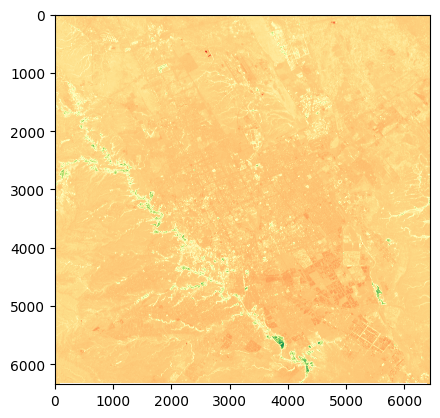

In [28]:
ndvi = NDVI.ReadAsArray()
plt.figure()
plt.imshow(ndvi, cmap='RdYlGn')



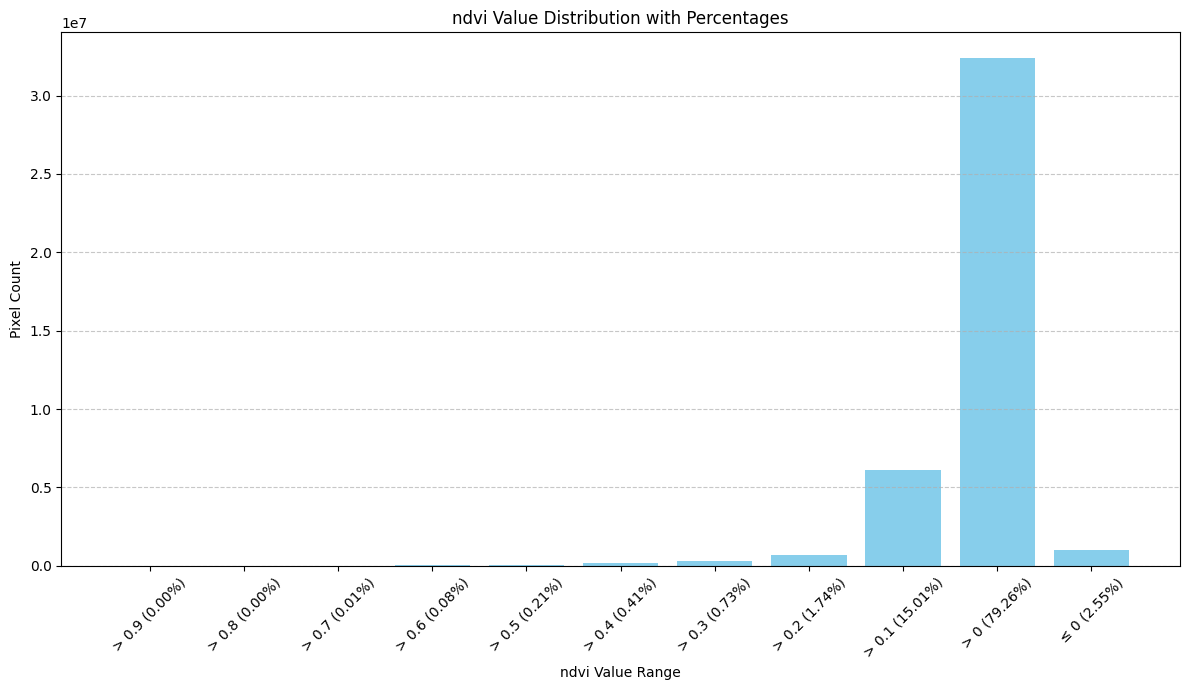

[0, 238, 5321, 32854, 86917, 165756, 297294, 710596, 6136784, 32413674, 1044091]


In [29]:


# Assuming ndvi is a numpy array
total_pixels = np.prod(ndvi.shape)  # Total number of pixels in the image

# Adjusted cluster counts to accommodate new classes
cluster_counts = [0] * 11  # 10 classes for 1-0.9, 0.89-0.8, ..., > 0, and one for ≤ 0

# Loop over each pixel in the ndvi array
for row in range(ndvi.shape[0]):
    for col in range(ndvi.shape[1]):
        value = ndvi[row, col]
        # Classify each pixel and increment the corresponding class count
        if value > 0.9:
            cluster_counts[0] += 1
        elif value > 0.8:
            cluster_counts[1] += 1
        elif value > 0.7:
            cluster_counts[2] += 1
        elif value > 0.6:
            cluster_counts[3] += 1
        elif value > 0.5:
            cluster_counts[4] += 1
        elif value > 0.4:
            cluster_counts[5] += 1
        elif value > 0.3:
            cluster_counts[6] += 1
        elif value > 0.2:
            cluster_counts[7] += 1
        elif value > 0.1:
            cluster_counts[8] += 1
        elif value > 0:
            cluster_counts[9] += 1
        else:
            cluster_counts[10] += 1

# Calculate percentages for each class
cluster_percentages = [count / total_pixels * 100 for count in cluster_counts]

# Adjust cluster labels to include percentages
cluster_labels = [
    f'> 0.9 ({cluster_percentages[0]:.2f}%)', 
    f'> 0.8 ({cluster_percentages[1]:.2f}%)', 
    f'> 0.7 ({cluster_percentages[2]:.2f}%)', 
    f'> 0.6 ({cluster_percentages[3]:.2f}%)', 
    f'> 0.5 ({cluster_percentages[4]:.2f}%)', 
    f'> 0.4 ({cluster_percentages[5]:.2f}%)', 
    f'> 0.3 ({cluster_percentages[6]:.2f}%)', 
    f'> 0.2 ({cluster_percentages[7]:.2f}%)', 
    f'> 0.1 ({cluster_percentages[8]:.2f}%)', 
    f'> 0 ({cluster_percentages[9]:.2f}%)', 
    f'≤ 0 ({cluster_percentages[10]:.2f}%)'
]

plt.figure(figsize=(12, 7))
plt.bar(cluster_labels, cluster_counts, color='skyblue')
plt.title('ndvi Value Distribution with Percentages')
plt.xlabel('ndvi Value Range')
plt.ylabel('Pixel Count')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()
print(cluster_counts)


In [11]:
def divide_image(image):

    height, width = image.shape

    part_width = width // 24
    part_height = height // 24

    parts = []
    for i in range(24):
        for j in range(24):
            part = image[i * part_height : (i + 1) * part_height, j * part_width : (j + 1) * part_width]
            parts.append(part)

    return parts

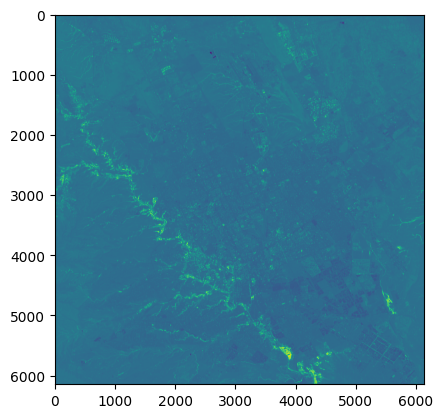

In [12]:
sliced_array = ndvi[:6144, :6144]
img = divide_image(sliced_array)
plt.imshow(sliced_array)

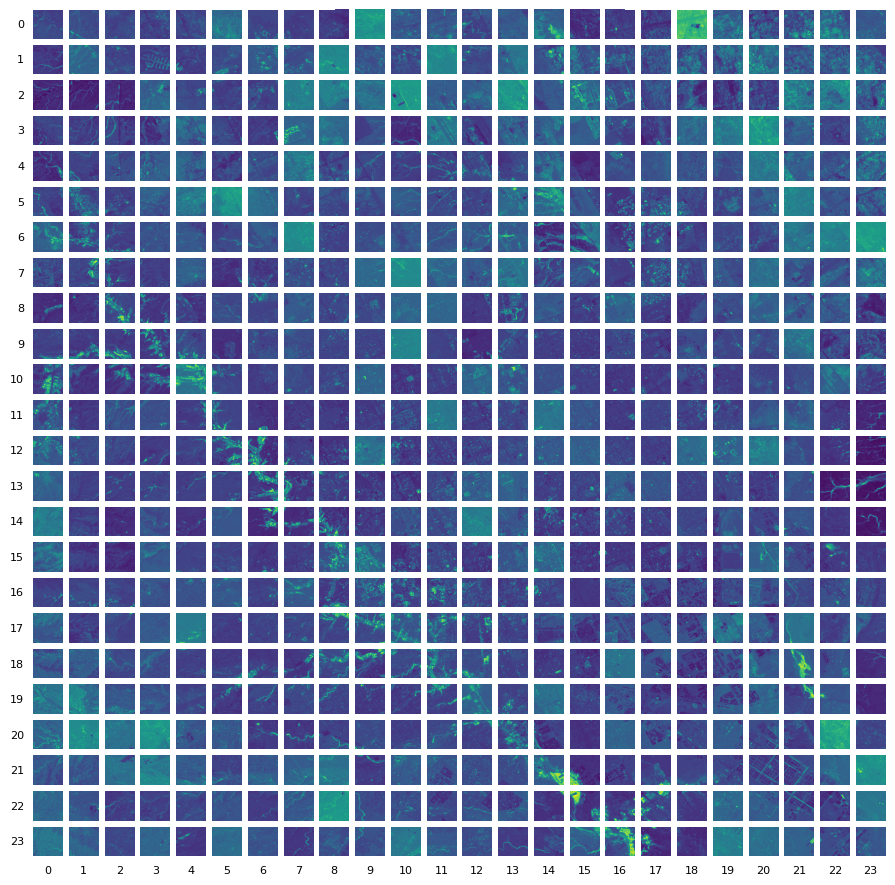

In [23]:

f, axarr = plt.subplots(24, 24, figsize=(11, 11))
k = 0
for i in range(24):  # Rows
    for j in range(24):  # Columns
        axarr[i, j].imshow(img[k])
        axarr[i, j].axis("off")
        k += 1

# Adding numbers to the left-most y-axis
for i in range(24):
    axarr[i, 0].text(-0.3, 0.5, str(i), transform=axarr[i, 0].transAxes, 
                      va='center', ha='right', color='black', fontsize=8)

# Adding numbers to the bottom x-axis
for j in range(24):
    axarr[23, j].text(0.5, -0.3, str(j), transform=axarr[23, j].transAxes, 
                       va='top', ha='center', color='black', fontsize=8)

plt.show()


In [ ]:
# and each sub-image in 'img' is accessible via its index.

def display_grid(img):
    f, axarr = plt.subplots(24, 24, figsize=(20, 20))
    plt.axis('off')
    k = 0
    for i in range(24):
        for j in range(24):
            axarr[i, j].imshow(img[k], cmap='RdYlGn')
            axarr[i, j].axis("off")
            k += 1
    plt.show()

def display_sub_image(img, row, col):
    if row < 0 or row >= 24 or col < 0 or col >= 24:
        print("Row and column must be between 0 and 23.")
        return
    
    index = row * 24 + col
    if index >= len(img):
        print("Index out of range. Make sure 'img' has at least", index + 1, "elements.")
        return
    
    plt.imshow(img[index], cmap='RdYlGn')
    plt.axis('off')
    plt.show()

In [ ]:
# Example usage:
# Assuming you have a list of images named 'img'
display_grid(img)  # This will display the entire 24x24 grid
display_sub_image(img, 0, 18)  # This will display the sub-image at row 5, column 10

In [10]:
import numpy as np
import os

def save_sub_images(img, output_folder='sub_images'):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over the sub-images and save each one
    for k, sub_image in enumerate(img):
        # Calculate row and column for naming
        row, col = divmod(k, 24)
        sub_image_filename = f'sub_image_{row}_{col}.npy'
        sub_image_path = os.path.join(output_folder, sub_image_filename)

        # Save the sub-image as a NumPy array
        np.save(sub_image_path, sub_image)

    print(f"Sub-images have been saved in the '{output_folder}' folder.")

# Assuming 'img' is your list of sub-images



In [11]:
save_sub_images(img)

Sub-images have been saved in the 'sub_images' folder.


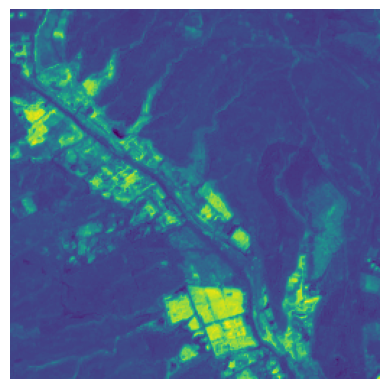

In [28]:
sub_image = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project-main\\Codes\\normal codes\\sub_images\\sub_image_8_2.npy"
# Load the sub-image as a NumPy array
sub_image = np.load(sub_image)

# Display the sub-image
plt.imshow(sub_image)
plt.axis('off')  # Hide the axes
plt.show()

In [29]:
# Get the dimensions of the sub-image
height, width = sub_image.shape[:2]  # Assuming sub_image is a 2D array or a 3D array with channels

# Calculate the total number of pixels
total_pixels = height * width

print(f"The sub-image has dimensions: {height} x {width}")
print(f"Total number of pixels in the sub-image: {total_pixels}")

The sub-image has dimensions: 256 x 256
Total number of pixels in the sub-image: 65536


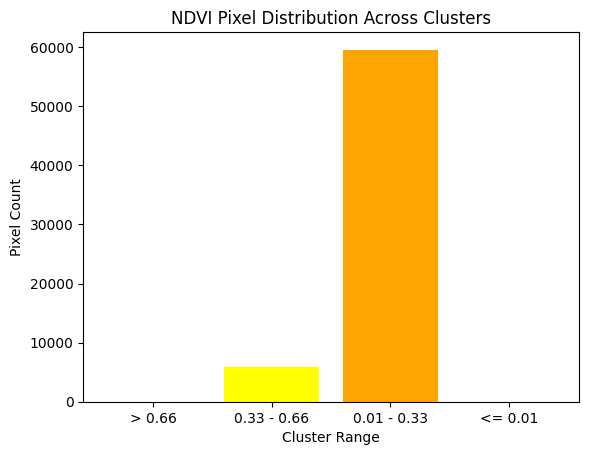

[5, 5934, 59564, 33]


In [30]:
cluster_counts = [0, 0, 0, 0]

# Loop over each pixel in the NDVI array
for row in range(sub_image.shape[0]):  
    for col in range(sub_image.shape[1]):  
        value = sub_image[row, col]
        if value > 0.66:
            cluster_counts[0] += 1
        elif value > 0.33:
            cluster_counts[1] += 1
        elif value > 0.01:
            cluster_counts[2] += 1
        else:
            cluster_counts[3] += 1

clusters = ['> 0.66', '0.33 - 0.66', '0.01 - 0.33', '<= 0.01']
plt.bar(clusters, cluster_counts, color=['green', 'yellow', 'orange', 'red'])
plt.title('NDVI Pixel Distribution Across Clusters')
plt.xlabel('Cluster Range')
plt.ylabel('Pixel Count')
plt.show()
print(cluster_counts)

[0, 0, 63089, 2447]
[5, 5934, 59564, 33]